In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

df = pd.read_csv("./Step-5 Combined CSV/Speech_data.csv")

In [2]:
# Extract features and target variable
X = df.drop('Output', axis=1)
y = df['Output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Get the class labels
labels = sorted(y.unique())

# Print confusion matrix with labels
print("Confusion Matrix:")
print("    ", end="")
for label in labels:
    print(f"{label:^8}", end="")
print()
for i, label in enumerate(labels):
    print(f"{label:<4}", end="")
    for j in range(len(labels)):
        print(f"{conf_matrix[i][j]:^8}", end="")
    print()

Accuracy: 0.8247

Confusion Matrix:
[[ 974   18    6   36   20   35   20   19]
 [  20  828    6   17   15   38   24    8]
 [  16   45  479   28   20   57   31   26]
 [  49    8    6 1238   18   21   27    6]
 [  12   15    1   23  829   20    8    1]
 [  37   47    7   37   22  914   28   16]
 [  44   39   13   49   33   29  761   10]
 [  30   53   29   38   17   59   30  500]]

Classification Report:
              precision    recall  f1-score   support

      Doctor       0.82      0.86      0.84      1128
        Move       0.79      0.87      0.82       956
          No       0.88      0.68      0.77       702
        Pain       0.84      0.90      0.87      1373
      Silent       0.85      0.91      0.88       909
      Toilet       0.78      0.82      0.80      1108
       Water       0.82      0.78      0.80       978
         Yes       0.85      0.66      0.75       756

    accuracy                           0.82      7910
   macro avg       0.83      0.81      0.82      7910

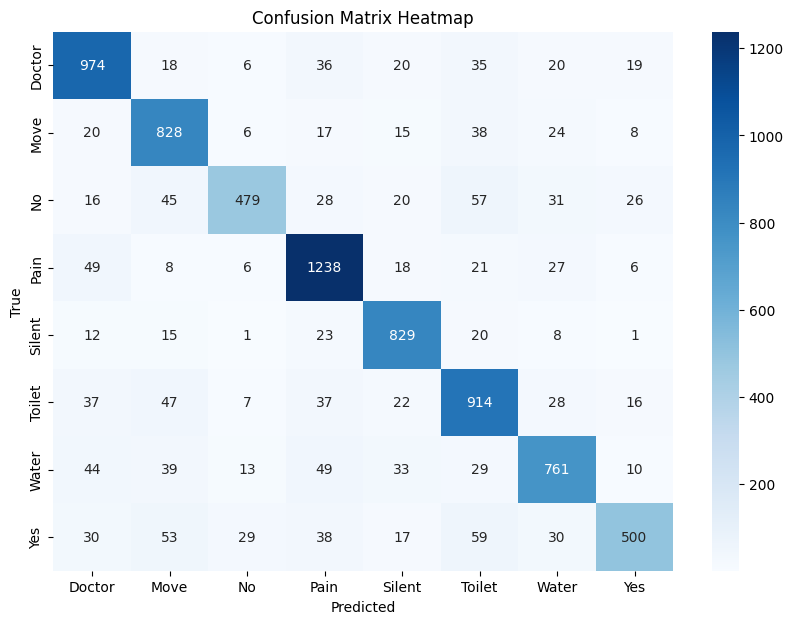

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [8]:
import numpy as np
from collections import Counter

new_data = pd.read_csv("sushant_new_water.csv") # water data

new_data = new_data.iloc[15:-15]

# Reset index after removing rows
new_data.reset_index(drop=True, inplace=True)

new_data.dropna(inplace=True)

# Replace inf values with NaN
new_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows containing NaN values
new_data.dropna(axis=0, inplace=True)

# Make predictions on the new data
new_data_predictions = rf_classifier.predict(new_data)

# Display the predictions
print('Predictions on New Data:')

print(Counter(new_data_predictions))

Predictions on New Data:
Counter({'Water': 23, 'Doctor': 14, 'Toilet': 8, 'Move': 4, 'No': 3, 'Pain': 2})
